In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Project Soccer/GOALKEEPERS.csv")

In [4]:
df.shape

(142, 18)

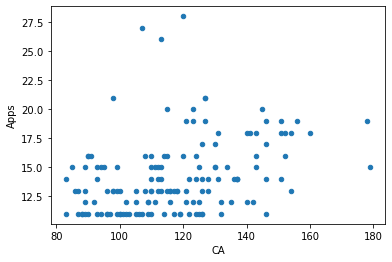

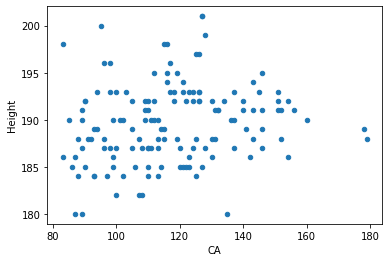

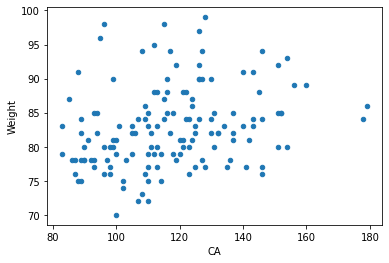

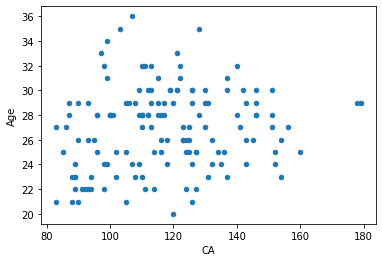

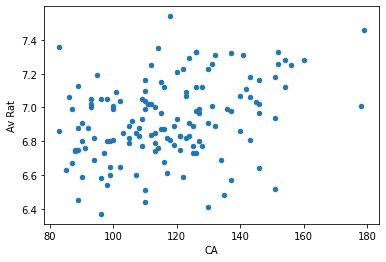

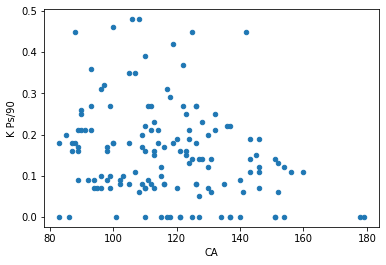

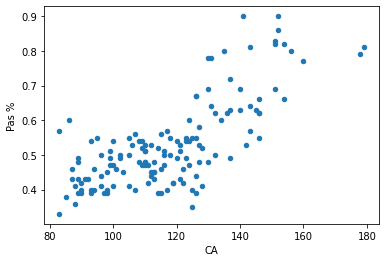

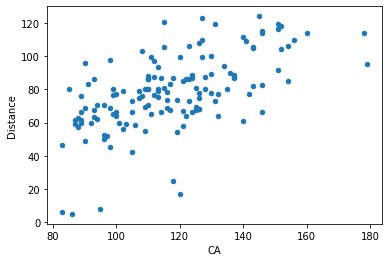

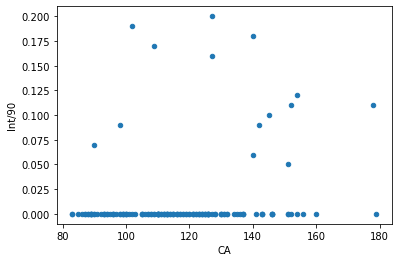

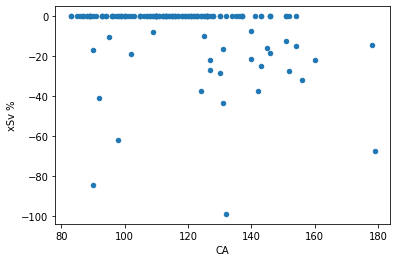

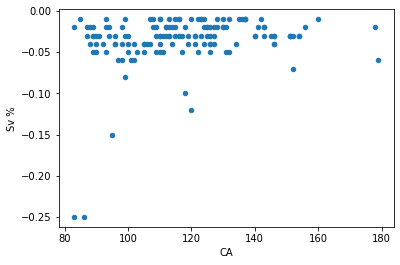

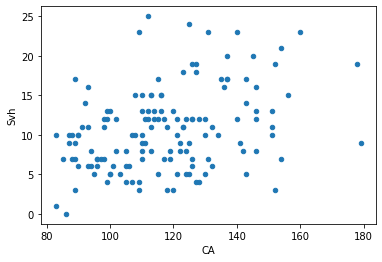

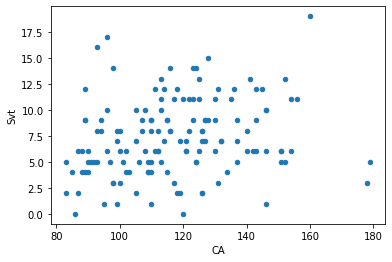

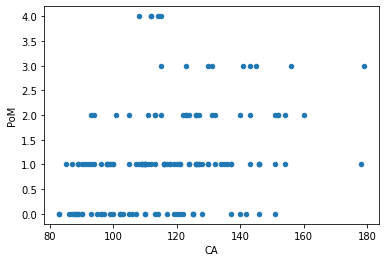

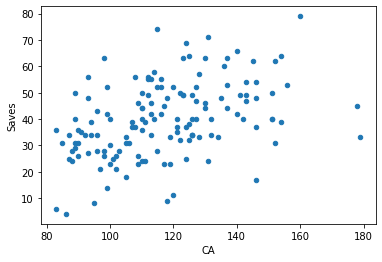

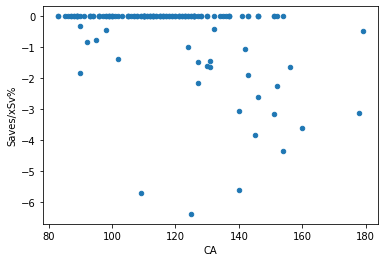

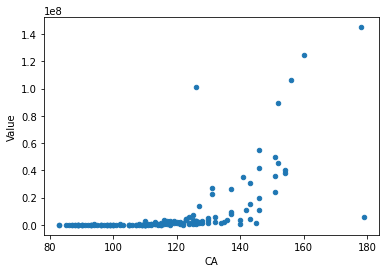

In [5]:
# Loop over all the columns in the DataFrame
for column in df.columns:
    if column == "CA":
        continue
    df.plot(kind='scatter', x='CA', y=column)

# Show the plot
plt.show()

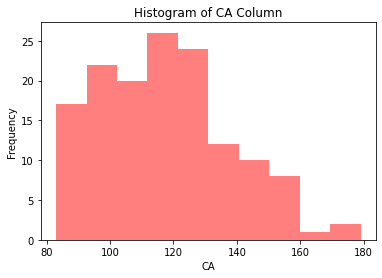

In [6]:
plt.hist(df['CA'],  color='red', alpha=0.5)
plt.xlabel('CA')
plt.ylabel('Frequency')
plt.title('Histogram of CA Column')
plt.show()

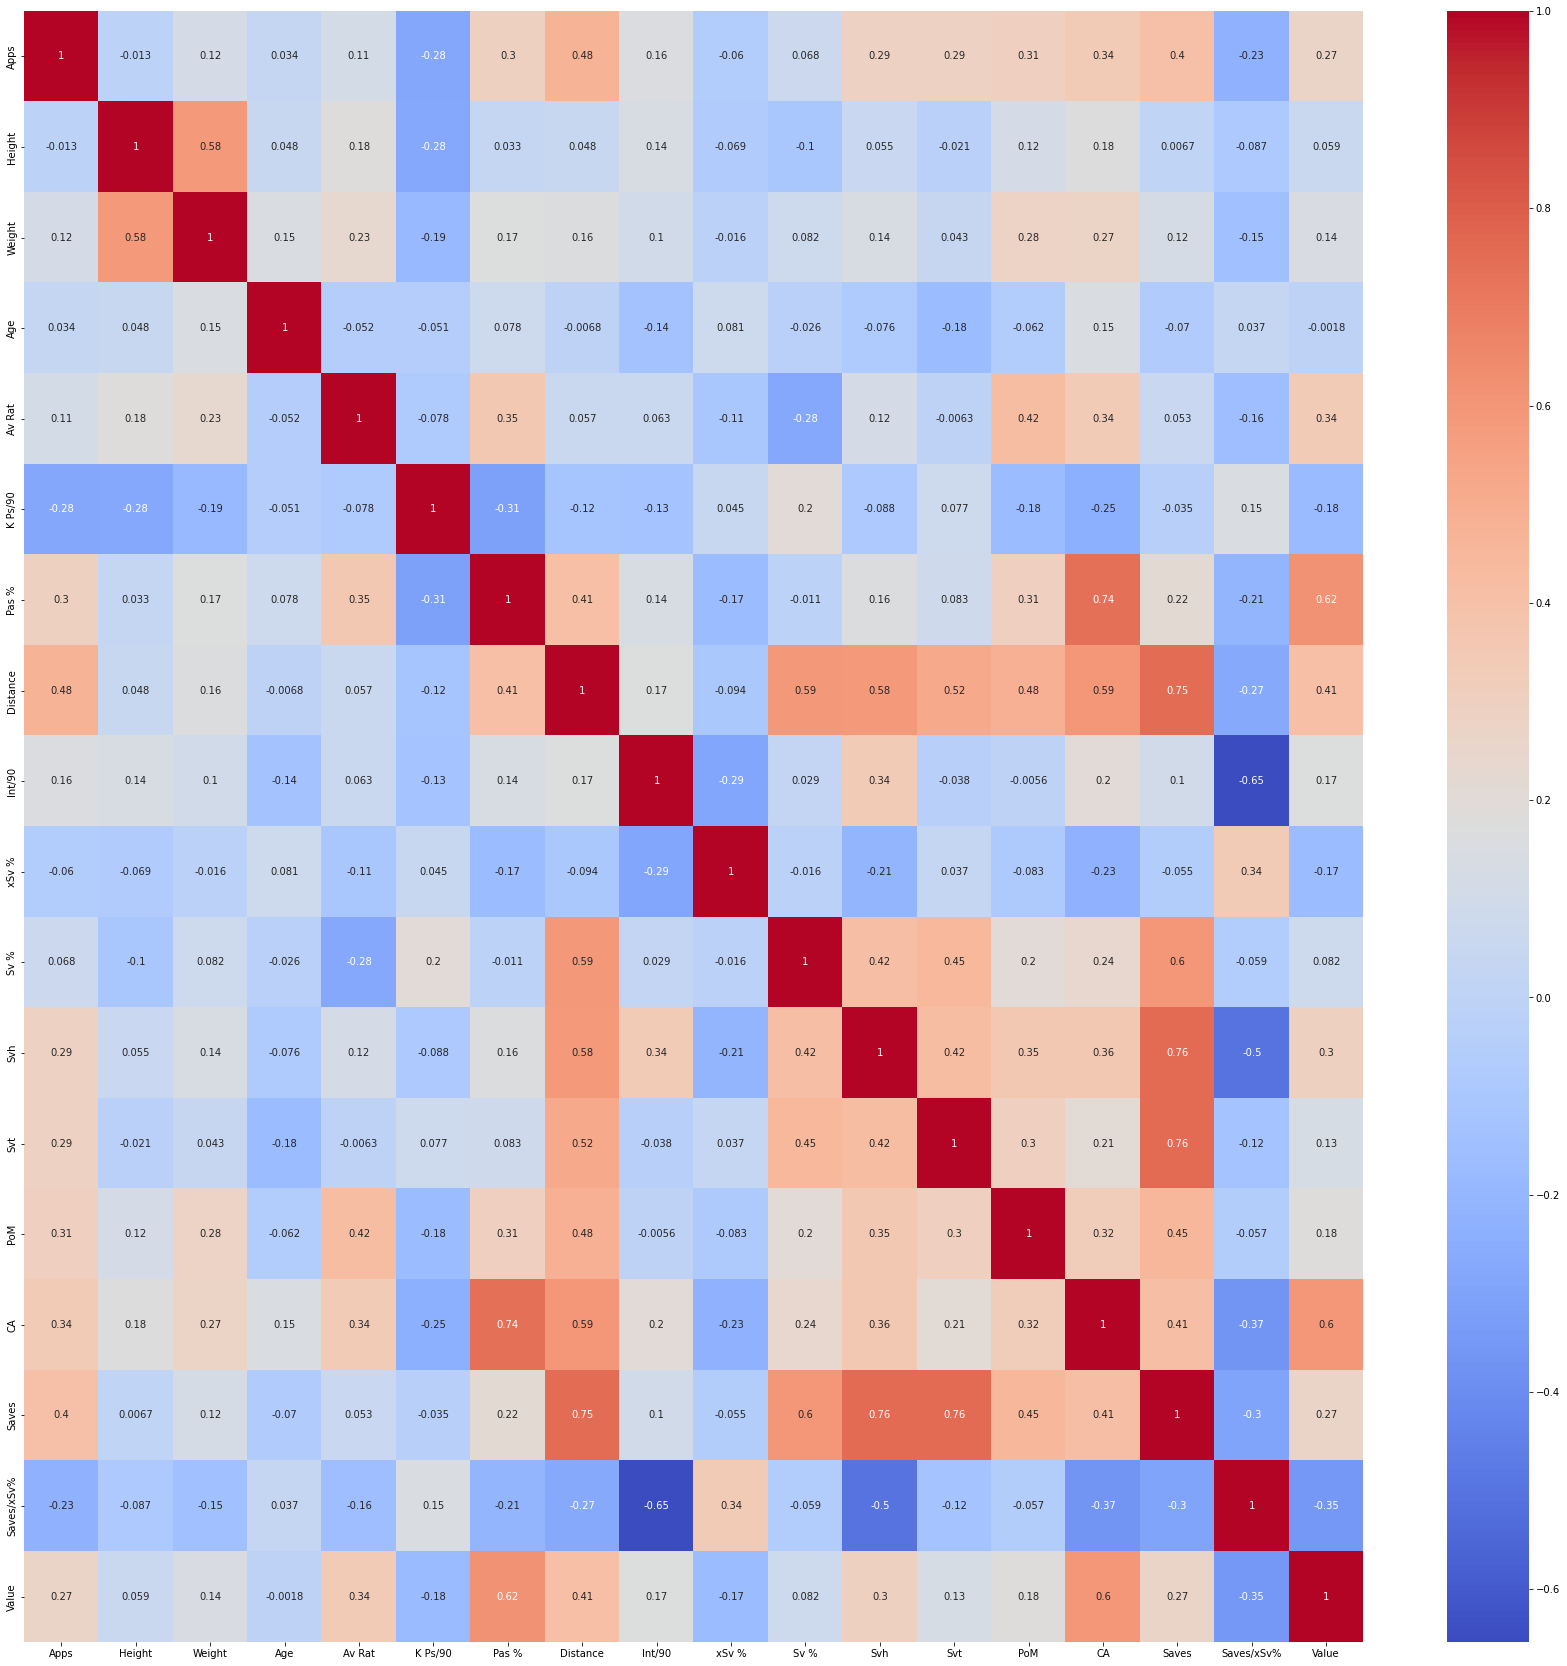

In [7]:
import seaborn as sns
plt.figure(figsize=(30,30))

# Calculate the correlations between the variables
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

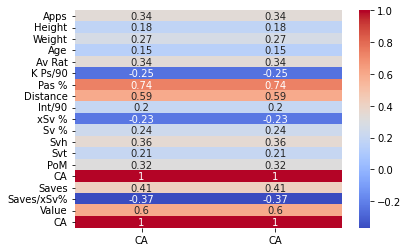

In [8]:
# Extract the target variable
target = df['CA']

# Concatenate the target variable with the dataframe
df = pd.concat([df, target], axis=1)

# Calculate the correlations between the variables and the target variable
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr[['CA']], annot=True, cmap='coolwarm')

In [9]:
X = df.drop("CA",axis=1)   #Feature Matrix
y = df["CA"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42)

Data Is Non-LineR Let's Try Linear Regression And Check Accuracy

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9.635162772865378


In [27]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.6146592456515312


In [28]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2 Score:", adj_r2)

Adjusted R2 Score: 0.2507263109890885


In [29]:
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [30]:
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [31]:
reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [32]:
y_pred_ridge = reg_ridge.predict(X_test)

In [33]:
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9.633482241211425


In [34]:
r2 = r2_score(y_test, y_pred_ridge)
print("R2 Score:", r2)

R2 Score: 0.6146499367167706


Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
gbr = GradientBoostingRegressor()

In [45]:
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [1, 3, 5],
              
              }

In [ ]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [47]:
grid = GridSearchCV(gbr, param_grid, cv=5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
135 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py", line 494, in fit
    y = column_or_1d(y, warn=True)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py", line 1038, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (84, 2)

ValueError: ignored